# Google Play Store Apps
### Web scraped data of 10k Play Store apps for analysing the Android market.

In [1]:
# The Play Store apps data has enormous potential to drive app-making businesses to success. 
# Actionable insights can be drawn for developers to work on and capture the Android market!

In [2]:
# 그래프를 통하여 최근 App 들의 Trend를 발견

In [3]:
# Android Matket에서 제공된 데이터만으로 App의 Rating을 예측하는 모델을 생성

## 0.데이터 확인

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
app=pd.read_csv("googleplaystore.csv",sep=",",parse_dates=["Last Updated"])

In [6]:
# Rating값이 상위 6위에 드는 데이터 출력 -> 즉각적으로 확인할 수 있는 경향이 보이는지 확인

In [7]:
app.sort_values(by="Rating",ascending=False).head(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
9511,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10,3.0M,"10,000+",Free,0,Everyone,Entertainment,"June 26, 2017",1.0.9,4.0 and up
10166,FA Player Essentials,SPORTS,5.0,7,68M,100+,Free,0,Everyone,Sports,"July 23, 2018",1.6.0,4.0.3 and up
7895,Dine In CT - Food Delivery,SHOPPING,5.0,4,1.6M,"1,000+",Free,0,Everyone,Shopping,"May 16, 2016",1.3,4.0 and up
5118,Eternal Light AG,SOCIAL,5.0,30,13M,100+,Free,0,Teen,Social,"May 19, 2018",1.04,4.0.3 and up
6953,BxPort - Bitcoin Bx (Thailand),FINANCE,5.0,4,4.1M,50+,Free,0,Everyone,Finance,"July 14, 2018",1.0.4,4.2 and up


In [8]:
app.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
# "Last Updated" 가 datetime으로 읽히지 않음 -> 추후 처리 필요

## 1.데이터 전처리

In [10]:
app.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [11]:
# Current Ver 과 Android Ver는 큰 의마가 없을 것으로 보여짐

### < 명목형 변수 수치화 >

#### Category 변수 처리

In [12]:
print(len(app.Category.unique()))
print(app.Category.unique())

34
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [13]:
app[app["Category"]=="1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
app["Category"]=app["Category"].replace("1.9","TOOLS")

In [15]:
category_number={'ART_AND_DESIGN':0, 'AUTO_AND_VEHICLES':1, 'BEAUTY':2, 'BOOKS_AND_REFERENCE':3,
 'BUSINESS':4, 'COMICS':5, 'COMMUNICATION':6, 'DATING':7, 'EDUCATION':8, 'ENTERTAINMENT':9,
 'EVENTS':10, 'FINANCE':11, 'FOOD_AND_DRINK':12, 'HEALTH_AND_FITNESS':13, 'HOUSE_AND_HOME':14,
 'LIBRARIES_AND_DEMO':15, 'LIFESTYLE':16, 'GAME':17, 'FAMILY':18, 'MEDICAL':19, 'SOCIAL':20,
 'SHOPPING':21, 'PHOTOGRAPHY':22, 'SPORTS':23, 'TRAVEL_AND_LOCAL':24, 'TOOLS':25,
 'PERSONALIZATION':26, 'PRODUCTIVITY':27, 'PARENTING':28, 'WEATHER':29, 'VIDEO_PLAYERS':30,
 'NEWS_AND_MAGAZINES':31, 'MAPS_AND_NAVIGATION':32}

In [16]:
app["Category"]=app["Category"].map(category_number).astype(int)
app["Category"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64)

#### Genres 변수 처리

In [17]:
print(len(app.Genres.unique()))
print(app.Genres.unique()) 

120
['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Pu

In [18]:
app[app["Category"]==17]["Genres"].unique() #'GAME':17

array(['Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
       'Action;Action & Adventure', 'Casual;Brain Games',
       'Simulation;Action & Adventure', 'Casino'], dtype=object)

In [19]:
# 요소 갯수가 많으므로, 각 요소마다 숫자를 부여하는 함수 작성

In [20]:
genres_list=app["Genres"].unique()

genres_dict={}
for i in range(len(genres_list)):
    genres_dict[genres_list[i]]=i

app["Genres"]=app["Genres"].map(genres_dict).astype(int)

In [21]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null int32
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null int32
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), int32(2), object(10)
memory usage: 1016.4+ KB


### < NAN 처리 & 명목형 변수 수치화 >

#### Type 변수 처리

In [22]:
app["Type"].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [23]:
app[pd.isnull(app["Type"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,18,NaN,0,Varies with device,0,NaN,0,Everyone 10+,37,"June 28, 2018",Varies with device,Varies with device


In [24]:
app["Type"]=app["Type"].fillna("Free")
app["Type"].unique()

array(['Free', 'Paid', '0'], dtype=object)

In [25]:
app[app["Type"]=="0"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,25,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,118,1.0.19,4.0 and up,NaN


In [26]:
app["Type"]=app["Type"].replace("0","Free")

In [27]:
def change_type(x):
    if x=="Paid":
        return 1
    else:
        return 0
    
app['Charge']=app['Type'].apply(change_type)

In [28]:
app["Charge"].unique()

array([0, 1], dtype=int64)

#### Content Rating 변수 처리

In [29]:
app["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [30]:
app[pd.isnull(app["Content Rating"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Charge
10472,Life Made WI-Fi Touchscreen Photo Frame,25,19.0,3.0M,"1,000+",Free,Free,Everyone,NaN,118,1.0.19,4.0 and up,NaN,0


In [31]:
app["Content Rating"]=app["Content Rating"].fillna("Everyone")
app["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [32]:
app[app["Content Rating"]=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Charge
7312,Best CG Photography,18,NaN,1,2.5M,500+,Free,0,Unrated,19,"June 24, 2015",5.2,3.0 and up,0
8266,DC Universe Online Map,25,4.1,1186,6.4M,"50,000+",Free,0,Unrated,91,"February 27, 2012",1.3,2.3.3 and up,0


In [33]:
# 겹치는 항목은 묶어서 카테고리화 진행

In [34]:
def change_Age(x):
    if x=='Everyone'or x=='Unrated':
        return 0
    elif x=='Everyone 10+' or x=='Teen':
        return 1
    else :
        return 2
    
app['Content Rating']=app['Content Rating'].apply(change_Age)

#### Installs 변수 처리

In [35]:
app["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [36]:
app[app["Installs"]=="Free"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Charge
10472,Life Made WI-Fi Touchscreen Photo Frame,25,19.0,3.0M,"1,000+",Free,Free,Everyone,0,118,1.0.19,4.0 and up,NaN,0


In [37]:
app["Installs"]=app["Installs"].replace("Free","1,000+")
app["Size"]=app["Size"].replace("1,000+","30M")
app["Reviews"]=app["Reviews"].replace("3.0M","0")
app["Price"]=app["Price"].replace("Everyone","0")
app["Last Updated"]=app["Last Updated"].replace("1.0.19","February 11, 2018")

app[app["Installs"]=="Free"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Charge


In [38]:
app["Installs"].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [39]:
app[app["Installs"]=="0"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Charge
9148,Command & Conquer: Rivals,18,NaN,0,Varies with device,0,Free,0,1,37,"June 28, 2018",Varies with device,Varies with device,0


In [40]:
Installs_number={'100+':0, '500+':1, '1,000+':2, '5,000+':3, '10,000+':4, '50,000+':5, 
                 '100,000+':6, '500,000+':7, '1,000,000+':8, '5,000,000+':9, 
                 '10,000,000+':10, '50,000,000+':11, '100,000,000+':12, '500,000,000+':13, 
                 '1,000,000,000+':14, '50+':20,'10+':20, '1+':20, '5+':20, '0+':20, '0':20}

In [41]:
app["Installs"]=app["Installs"].map(Installs_number)
app["Installs"].unique()

array([ 4,  7,  9, 11,  6,  5,  8, 10,  3, 12, 14,  2, 13, 20,  0,  1],
      dtype=int64)

#### Reviews 변수 처리

In [42]:
app["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [43]:
app["Reviews"]=pd.to_numeric(app["Reviews"])
# app['Reviews'] = app['Reviews'].astype(int)

app["Reviews"].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307], dtype=int64)

In [44]:
app["Reviews"].max()

78158306

In [45]:
# x==0 이면 0
# x>0  and x<100 이면 1
# x>=100 and x<500 이면 2
# x>=500 and x<1000 이면 3
# x>=1000 and x<5000 이면 4
# x>=5000 and x<10000 이면 5
# x>=10000 and x<50000 이면 6
#  ... ...
# x>=50000000 and x<100000000 이면 13
# x>=100000000 and x<500000000 이면 14

In [46]:
def change_reviews(x):
    for i in range(1,8):
        if x==0:
            return 0
        elif x>0 and x<10*10**i:
            return 2*i-1
        elif x>10*10**i and x<50*10**i:
            return 2*i

In [47]:
# Reviews_c 라는 열을 추가 : Reviews를 카테고리 한 값을 넣기
# Reviews와 Reviews_c 중 어느것이 더 효과적일지는 분석결과로 확인

In [48]:
app['Reviews_c']=app['Reviews'].apply(change_reviews)
app['Reviews_c'].unique()

array([ 2,  3,  7,  8,  6,  5,  4,  1, 10,  9, 13, 11, 12,  0],
      dtype=int64)

### < 글자 추출 (정규표현식) >

#### Price 변수 처리

In [49]:
app["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [50]:
# Price에서 $기호를 제외하고 숫자만 추출 -> 정규표현식 사용

In [51]:
pick_float=[]
pick_float2=[]

for i in app["Price"]:
    pick_float=re.findall("[0-9.]+",i)
    pick_float2+=pick_float

In [52]:
pick_float3=pd.Series(pick_float2)
pick_float3.unique()

app["Price"]=pick_float3
app["Price"]=pd.to_numeric(app["Price"])

In [53]:
# app['Price'].str.extract('[0-9.]+')astype(float)

In [54]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
App               10841 non-null object
Category          10841 non-null int32
Rating            9367 non-null float64
Reviews           10841 non-null int64
Size              10841 non-null object
Installs          10841 non-null int64
Type              10841 non-null object
Price             10841 non-null float64
Content Rating    10841 non-null int64
Genres            10841 non-null int32
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
Charge            10841 non-null int64
Reviews_c         10841 non-null int64
dtypes: float64(2), int32(2), int64(5), object(6)
memory usage: 1.2+ MB


#### Size 변수 처리

In [55]:
# app.Size.unique()

In [56]:
# app[app["Size"]=="Varies with device"]

In [57]:
# Varies with device 값은 수정이 불가능하므로 Nan으로 처리 후 대체

In [58]:
def size_change(x):
    if 'M' in x:
        a=x[:-1]
        b=float(a)*1000000         # M(bit)= 1000000bit
        return(b)
    elif "k" in x:
        a=x[:-1]
        b=float(a)*1000            # k(bit)= 1000bit
        return(b)
    else:
        return None

In [59]:
app["Size"]=app["Size"].map(size_change)

In [60]:
app["Size"].head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64

In [61]:
app["Size"].fillna(method = 'ffill', inplace = True) 

In [62]:
# method = 'ffill' : 결측값을 직전 값으로 대체

In [63]:
app["Size"].isnull().sum()

0

#### Last Updated 변수 처리

In [64]:
app["Last Updated"].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [65]:
import datetime

In [66]:
# "Last Updated" 열을 datetime으로 Type 변환 해주는 작업

In [67]:
pick_date=[]
pick_date2=[]

for i in range(0,10841):
    pick_date=datetime.datetime.strptime(app["Last Updated"][i],"%B %d, %Y")
    pick_date2.append(pick_date)
    
# print(pick_date2)

pick_date3=pd.Series(pick_date2)
pick_date3.unique()

app["Last Updated"]=pick_date3
app["Last Updated"].unique()

array(['2018-01-07T00:00:00.000000000', '2018-01-15T00:00:00.000000000',
       '2018-08-01T00:00:00.000000000', ...,
       '2014-01-20T00:00:00.000000000', '2014-02-16T00:00:00.000000000',
       '2014-03-23T00:00:00.000000000'], dtype='datetime64[ns]')

In [68]:
# datetime 특성을 이용하여 날짜 계산 ( 기준 날짜 - 업데이트 날짜 )

In [69]:
a=datetime.datetime.strptime("December 30, 2018","%B %d, %Y")
b=datetime.datetime.strptime("January 20, 2014","%B %d, %Y")
a-b

datetime.timedelta(1805)

In [70]:
app["UpdateTerm"]=app["Last Updated"]

In [71]:
# 기준이 되는 날짜는 임의 x 로 지정

In [72]:
x=datetime.datetime.strptime("December 30, 2018","%B %d, %Y")

pick_diff=[]
pick_diff2=[]

for i in range(0,10841):
    pick_diff= x - app["Last Updated"][i]
    pick_diff2.append(pick_diff)
    
# print(pick_diff2)

In [73]:
# 계산된 값에서 day의 수치 값만 추출

In [74]:
pick_diff2=pd.Series(pick_diff2)
pick_diff2[0].days

357

In [75]:
pick_day=[]
pick_day2=[]

for i in range(0,10841):
    pick_day=pick_diff2[i].days
    pick_day2.append(pick_day)
    
pick_day3=pd.Series(pick_day2)
pick_day3.unique()
# print(pick_day3)

app["UpdateTerm"]=pick_day3

In [76]:
app.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Charge,Reviews_c,UpdateTerm
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19000000.0,4,Free,0.0,0,0,2018-01-07,1.0.0,4.0.3 and up,0,2,357
1,Coloring book moana,0,3.9,967,14000000.0,7,Free,0.0,0,1,2018-01-15,2.0.0,4.0.3 and up,0,3,349


#### App 변수 처리

In [77]:
# App 이름에 담긴 내용은 Category 또는 Genres 와 유사함
# App 이름의 길이가 Rating과 연관이 있을 것으로 예상됨

In [78]:
def count_x(x):
    return len(x)
    
app["NameLen"]=app["App"].apply(count_x)

#### Rating 변수 처리

In [79]:
app[app["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Charge,Reviews_c,UpdateTerm,NameLen
10472,Life Made WI-Fi Touchscreen Photo Frame,25,19.0,0,30000000.0,2,Free,0.0,0,118,2018-02-11,4.0 and up,NaN,0,0,322,39


In [80]:
app=app.drop(10472,0)    #Rating 값을 예측할 수 는 없으므로 과감히 삭제

In [81]:
app[app["Rating"]>5 ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Charge,Reviews_c,UpdateTerm,NameLen


### < 변수 정리하기 >

In [82]:
app["RecomendAge"]=app["Content Rating"]

app=app.drop(["Content Rating","Last Updated","Current Ver","Android Ver","Type","App"],axis=1)

In [83]:
app = app[app["Installs"] != 20] #표본수가 작은 데이터 삭제

In [84]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10085 entries, 0 to 10840
Data columns (total 12 columns):
Category       10085 non-null int32
Rating         9229 non-null float64
Reviews        10085 non-null int64
Size           10085 non-null float64
Installs       10085 non-null int64
Price          10085 non-null float64
Genres         10085 non-null int32
Charge         10085 non-null int64
Reviews_c      10085 non-null int64
UpdateTerm     10085 non-null int64
NameLen        10085 non-null int64
RecomendAge    10085 non-null int64
dtypes: float64(3), int32(2), int64(7)
memory usage: 945.5 KB


In [85]:
# 열 순서 정렬

In [86]:
app=pd.DataFrame(app,columns=["NameLen","Category",'Genres',"RecomendAge","Charge","Price","UpdateTerm","Size","Installs","Reviews","Reviews_c","Rating"])

In [87]:
app.tail()

,NameLen,Category,Genres,RecomendAge,Charge,Price,UpdateTerm,Size,Installs,Reviews,Reviews_c,Rating
10836,16,18,13,0,0,0.0,523,53000000.0,3,38,1,4.5
10837,32,18,13,0,0,0.0,177,3600000.0,0,4,1,5.0
10838,22,19,85,0,0,0.0,709,9500000.0,2,3,1,NaN
10839,29,3,6,2,0,0.0,1441,9500000.0,2,114,2,4.5
10840,45,16,29,0,0,0.0,158,19000000.0,10,398307,8,4.5


#### test용 데이터 분리 (Rating 값이 NAN인 자료)

In [88]:
import warnings
warnings.filterwarnings("ignore") 

In [89]:
# Rating 값이 없는 데이터는 test용 데이터로 분리

In [90]:
app_test=app[pd.isnull(app["Rating"])]
app_test.drop("Rating", axis=1,inplace=True)

app=app[pd.isnull(app["Rating"])==False]

In [91]:
print(app_test.info())
print("="*50)
print(app.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 23 to 10838
Data columns (total 11 columns):
NameLen        856 non-null int64
Category       856 non-null int32
Genres         856 non-null int32
RecomendAge    856 non-null int64
Charge         856 non-null int64
Price          856 non-null float64
UpdateTerm     856 non-null int64
Size           856 non-null float64
Installs       856 non-null int64
Reviews        856 non-null int64
Reviews_c      856 non-null int64
dtypes: float64(2), int32(2), int64(7)
memory usage: 73.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9229 entries, 0 to 10840
Data columns (total 12 columns):
NameLen        9229 non-null int64
Category       9229 non-null int32
Genres         9229 non-null int32
RecomendAge    9229 non-null int64
Charge         9229 non-null int64
Price          9229 non-null float64
UpdateTerm     9229 non-null int64
Size           9229 non-null float64
Installs       9229 non-null int64
Reviews        9229 n

## 2. 데이터 분석

In [92]:
app.shape

(9229, 12)

In [93]:
app.describe()

,NameLen,Category,Genres,RecomendAge,Charge,Price,UpdateTerm,Size,Installs,Reviews,Reviews_c,Rating
count,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000,9.229000e+03,9229.000000,9.229000e+03,9229.000000,9229.000000
mean,23.306642,17.786326,50.849496,0.259291,0.066421,0.960430,394.544479,2.320426e+07,6.685773,5.216806e+05,4.880485,4.186467
std,12.453695,7.340255,34.111895,0.540364,0.249030,15.927958,395.551312,2.327035e+07,3.199188,3.166666e+06,2.981688,0.504563
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144.000000,8.500000e+03,0.000000,1.000000e+00,1.000000,1.000000
25%,14.000000,14.000000,20.000000,0.000000,0.000000,0.000000,159.000000,5.600000e+06,4.000000,2.130000e+02,2.000000,4.000000
50%,22.000000,18.000000,39.000000,0.000000,0.000000,0.000000,210.000000,1.500000e+07,7.000000,6.450000e+03,5.000000,4.300000
75%,30.000000,23.000000,89.000000,0.000000,0.000000,0.000000,446.000000,3.300000e+07,9.000000,8.501500e+04,7.000000,4.500000
max,194.000000,32.000000,119.000000,2.000000,1.000000,400.000000,3145.000000,1.000000e+08,14.000000,7.815831e+07,13.000000,5.000000


In [94]:
app['RecomendAge'].value_counts()

0    7297
1    1471
2     461
Name: RecomendAge, dtype: int64

In [95]:
app['Charge'].value_counts()

0    8616
1     613
Name: Charge, dtype: int64

### < 그래프 출력 >

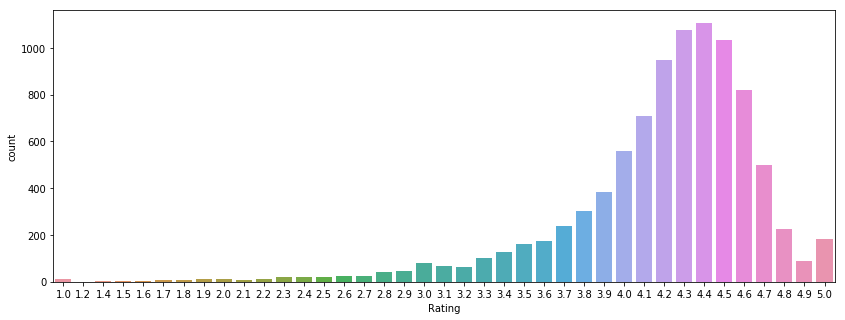

In [96]:
fig, axes = plt.subplots(1,1, figsize=(14,5))
sns.countplot('Rating',data=app)

In [97]:
# Rating의 값이 4.0에서 4.7 사이에 몰려 있음을 확인

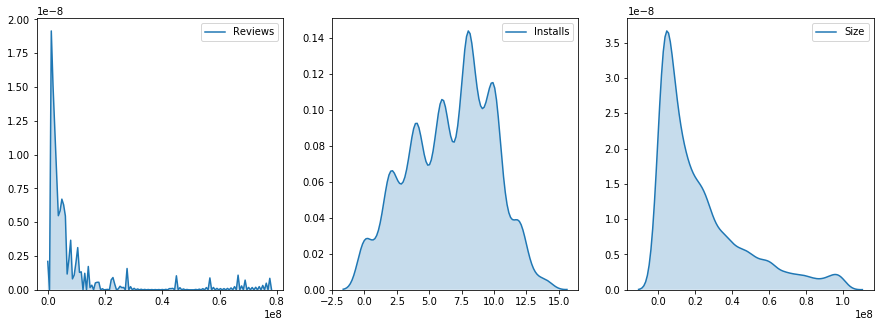

In [98]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.kdeplot(app.Reviews, shade = True,ax=axes[0])
sns.kdeplot(app.Installs, shade = True,ax=axes[1])
sns.kdeplot(app.Size, shade = True,ax=axes[2])

In [99]:
# 대부분의 어플은 20M 이내의 용량을 가지고 있음을 확인 -> 크기가 작은 어플 선호?

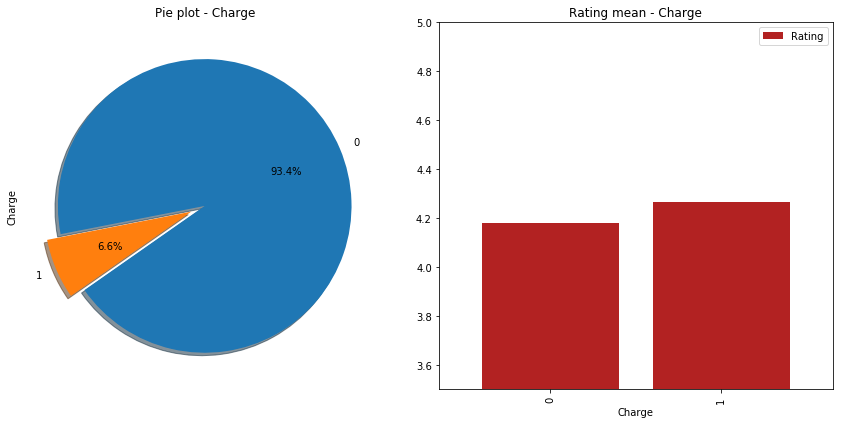

In [100]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

app["Charge"].value_counts().plot.pie(autopct='%1.1f%%', explode=[0,0.1], startangle=215, shadow=True, ax=axes[0])
axes[0].set_title("Pie plot - Charge")

app[['Charge','Rating']].groupby("Charge").mean().plot.bar(ylim=(3.5,5),color='firebrick',width=0.8, ax=axes[1])
axes[1].set_title("Rating mean - Charge")

plt.tight_layout()

In [101]:
# Rating의 값에는 큰 차이가 없으나, 대부분의 어플이 무료임을 확인

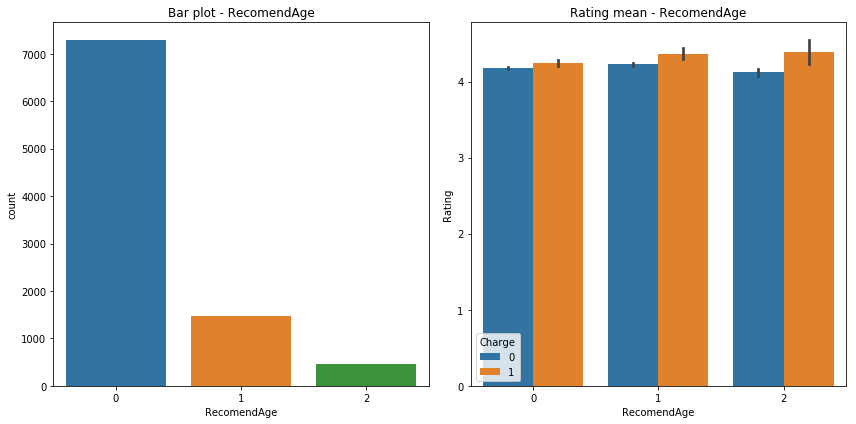

In [102]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

sns.countplot('RecomendAge',data=app,ax=axes[0])
axes[0].set_title("Bar plot - RecomendAge")
# app[['RecomendAge','Rating']].groupby("RecomendAge").mean().plot.bar(ylim=(3.5,5),color='firebrick',width=0.8,ax=axes[1])

sns.barplot(x='RecomendAge', y='Rating', hue='Charge', data=app,ax=axes[1])
axes[1].set_title("Rating mean - RecomendAge")

plt.tight_layout()

In [103]:
# 유료인 어플이 대체적으로 높은 Rating 보이고 있다.

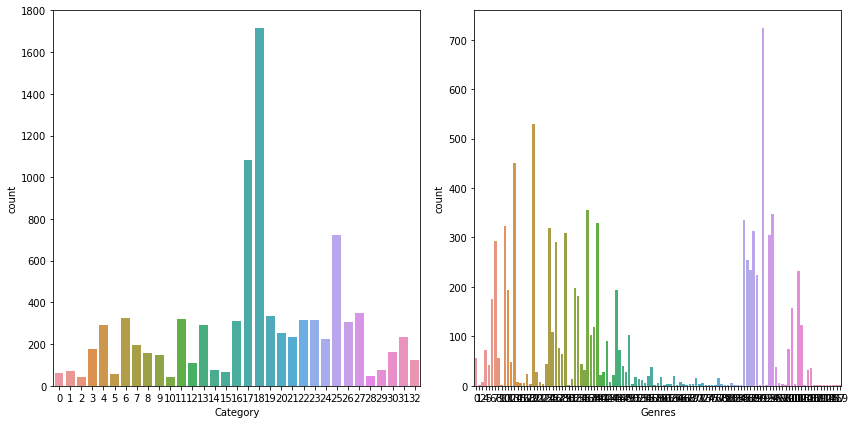

In [104]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))

sns.countplot('Category',data=app, ax=ax1)
sns.countplot('Genres',data=app, ax=ax2)

plt.tight_layout()

In [105]:
# 인기가 많은 분야를 확인 -> 주로 Game 과 Family  

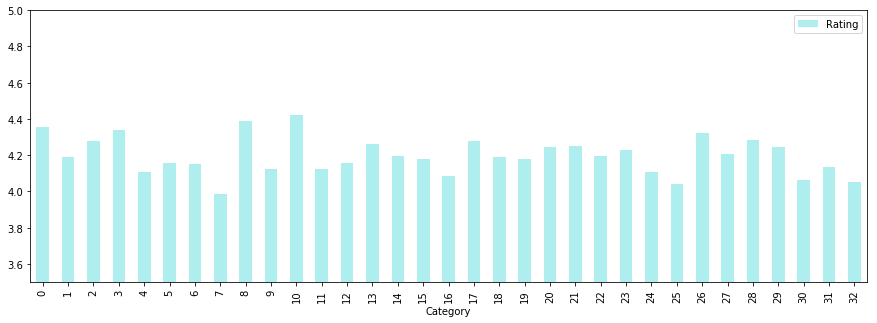

In [106]:
app[['Category','Rating']].groupby("Category").mean().plot.bar(ylim=(3.5,5),color='paleturquoise',figsize=(15,5))

In [107]:
# 해당 카테고리의 인기와 Rating값은 큰 연관성이 보이지 않는다.

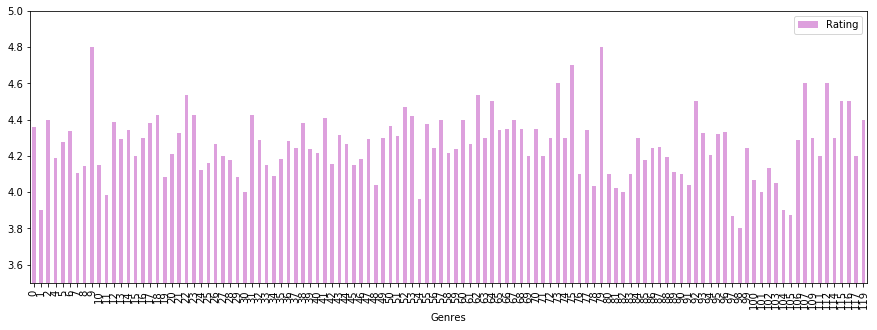

In [108]:
app[['Genres','Rating']].groupby("Genres").mean().plot.bar(ylim=(3.5,5), color='plum',figsize=(15,5))

In [109]:
# Rating 값이 높은 장르 : 'Board;Pretend Play', 'Comics;Creativity'  / Rating 값이 낮은 장르 : 'Parenting;Brain Games'

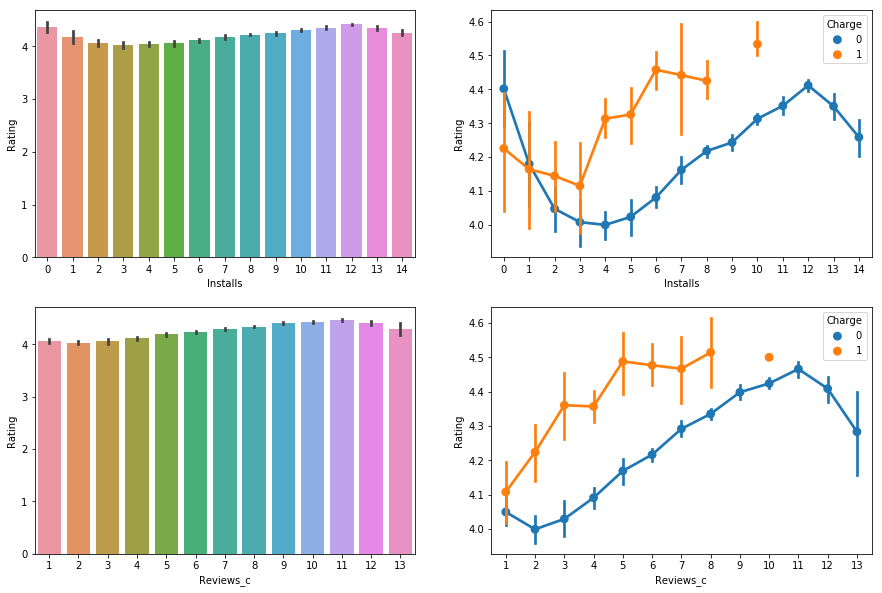

In [110]:
fig, axes = plt.subplots(2,2)

sns.barplot(data=app, x='Installs',y='Rating',ax=axes[0][0])
sns.pointplot(x='Installs',y='Rating', data=app, hue='Charge',ax=axes[0][1])
sns.barplot(data=app, x='Reviews_c',y='Rating',ax=axes[1][0])
sns.pointplot(x='Reviews_c',y='Rating', data=app, hue='Charge',ax=axes[1][1])

fig.set_size_inches(15,10)
plt.show()

In [111]:
# Rating과 Reviews, Installs 와의 연관성을 확인

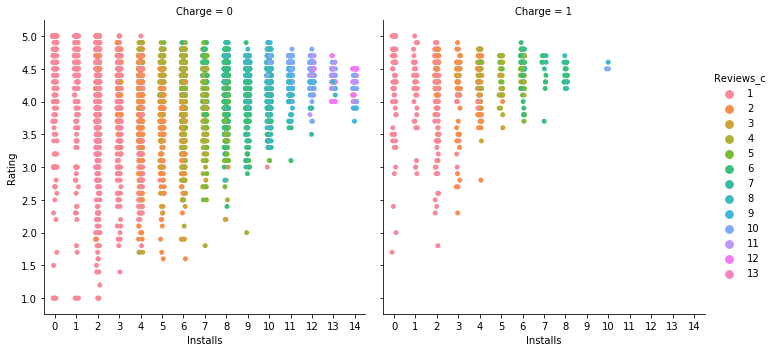

In [112]:
sns.catplot(x="Installs", y="Rating", hue="Reviews_c",col="Charge", data=app)

In [113]:
# Reviews와 Installs 간의 연관성 확인
# Installs가 높은 어플은 중에서 낮은 Rating값을 보이는 표본은 없음  
# 유로인 어플은 설치 수가 일정 수준 이상을 넘기 어려움

#### Correlation analysis

In [114]:
app.corr()

,NameLen,Category,Genres,RecomendAge,Charge,Price,UpdateTerm,Size,Installs,Reviews,Reviews_c,Rating
NameLen,1.000000,-0.030340,0.010568,0.068184,-0.017260,-0.025238,-0.151394,0.024698,0.095187,-0.029452,0.087833,0.150228
Category,-0.030340,1.000000,0.845664,-0.104985,0.047900,-0.014965,0.062335,-0.042690,0.029969,-0.013659,0.024223,-0.025540
Genres,0.010568,0.845664,1.000000,-0.098530,0.063799,-0.023256,0.028808,-0.096589,0.048594,-0.004749,0.033965,-0.027153
RecomendAge,0.068184,-0.104985,-0.098530,1.000000,-0.041831,-0.017217,-0.081645,0.162151,0.121794,0.060899,0.155299,0.007546
Charge,-0.017260,0.047900,0.063799,-0.041831,1.000000,0.226075,0.168613,-0.032361,-0.272090,-0.042661,-0.182826,0.041048
Price,-0.025238,-0.014965,-0.023256,-0.017217,0.226075,1.000000,0.002903,-0.025758,-0.065245,-0.009820,-0.051940,-0.022479
UpdateTerm,-0.151394,0.062335,0.028808,-0.081645,0.168613,0.002903,1.000000,-0.214270,-0.286814,-0.088577,-0.290664,-0.142573
Size,0.024698,-0.042690,-0.096589,0.162151,-0.032361,-0.025758,-0.214270,1.000000,0.292264,0.150531,0.330982,0.089889
Installs,0.095187,0.029969,0.048594,0.121794,-0.272090,-0.065245,-0.286814,0.292264,1.000000,0.288985,0.938049,0.158525
Reviews,-0.029452,-0.013659,-0.004749,0.060899,-0.042661,-0.009820,-0.088577,0.150531,0.288985,1.000000,0.340924,0.071837


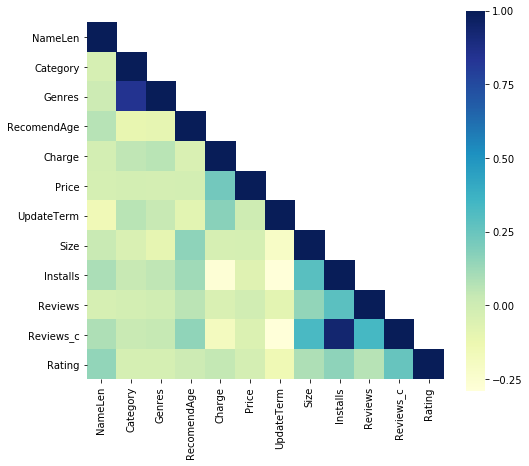

In [115]:
corrApp=app.corr()
mask=np.array(corrApp)
mask[np.tril_indices_from(mask)]=False

plt.figure(figsize=(8, 7))
sns.heatmap(corrApp,mask=mask,square=True,cmap="YlGnBu")

#### Linear regression

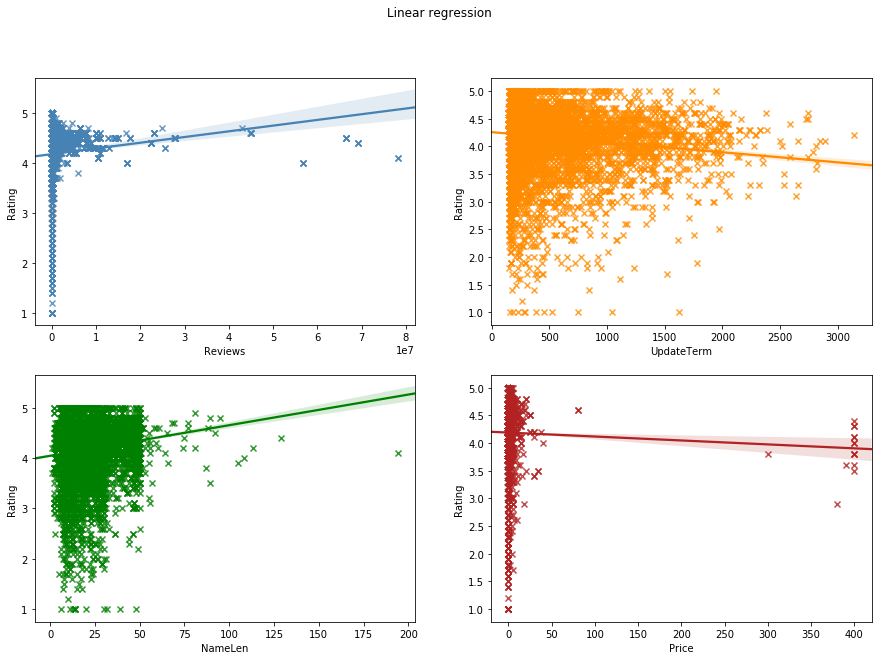

In [116]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)

sns.regplot("Reviews","Rating", data=app,color="steelblue", label = 'Reviews', marker = 'x',ax=ax1)
sns.regplot("UpdateTerm","Rating", data=app,color="darkorange",label = 'UpdateTerm', marker = 'x',ax=ax2)
sns.regplot("NameLen","Rating", data=app, color="g",marker = 'x',ax=ax3)
sns.regplot("Price","Rating", data=app, color="firebrick",marker = 'x',ax=ax4)

# ax4.set(ylabel='Rating',xlabel='NameLen',title='<NameLen & Rating>')
fig.suptitle("Linear regression")

fig.set_size_inches(15,10)

In [117]:
# 앱 이름의 길이와 Rating과 양의 상관관계를 가짐을 확인
# 어플의 금액이 높아질 수록 Rating값은 하락하는 추세를 보임

### < 데이터 표준화 >

In [118]:
from numpy import *
app["NameLen"]=(app["NameLen"]-mean(app["NameLen"],axis=0))/std(app["NameLen"],axis=0)

In [119]:
app["NameLen"].std()

1.0000541814537298

In [120]:
import scipy.stats as ss
app["UpdateTerm"]=ss.zscore(app["UpdateTerm"])

In [121]:
app["UpdateTerm"].std()

1.0000541814537276

In [122]:
app["Price"]=ss.zscore(app["Price"])
app["Price"].std()

1.000054181453563

In [123]:
app.describe()

,NameLen,Category,Genres,RecomendAge,Charge,Price,UpdateTerm,Size,Installs,Reviews,Reviews_c,Rating
count,9.229000e+03,9229.000000,9229.000000,9229.000000,9229.000000,9.229000e+03,9.229000e+03,9.229000e+03,9229.000000,9.229000e+03,9229.000000,9229.000000
mean,-3.354608e-16,17.786326,50.849496,0.259291,0.066421,1.984957e-15,1.530217e-15,2.320426e+07,6.685773,5.216806e+05,4.880485,4.186467
std,1.000054e+00,7.340255,34.111895,0.540364,0.249030,1.000054e+00,1.000054e+00,2.327035e+07,3.199188,3.166666e+06,2.981688,0.504563
min,-1.791264e+00,0.000000,0.000000,0.000000,0.000000,-6.030165e-02,-6.334401e-01,8.500000e+03,0.000000,1.000000e+00,1.000000,1.000000
25%,-7.473402e-01,14.000000,20.000000,0.000000,0.000000,-6.030165e-02,-5.955163e-01,5.600000e+06,4.000000,2.130000e+02,2.000000,4.000000
50%,-1.049257e-01,18.000000,39.000000,0.000000,0.000000,-6.030165e-02,-4.665753e-01,1.500000e+07,7.000000,6.450000e+03,5.000000,4.300000
75%,5.374887e-01,23.000000,89.000000,0.000000,0.000000,-6.030165e-02,1.300926e-01,3.300000e+07,9.000000,8.501500e+04,7.000000,4.500000
max,1.370698e+01,32.000000,119.000000,2.000000,1.000000,2.505413e+01,6.953850e+00,1.000000e+08,14.000000,7.815831e+07,13.000000,5.000000


## 3. 데이터 모델링

### < 모델링용 데이터 분리 >

In [124]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9229 entries, 0 to 10840
Data columns (total 12 columns):
NameLen        9229 non-null float64
Category       9229 non-null int32
Genres         9229 non-null int32
RecomendAge    9229 non-null int64
Charge         9229 non-null int64
Price          9229 non-null float64
UpdateTerm     9229 non-null float64
Size           9229 non-null float64
Installs       9229 non-null int64
Reviews        9229 non-null int64
Reviews_c      9229 non-null int64
Rating         9229 non-null float64
dtypes: float64(5), int32(2), int64(5)
memory usage: 1.2 MB


In [125]:
app_data=app.drop("Rating", axis=1)
print(app_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9229 entries, 0 to 10840
Data columns (total 11 columns):
NameLen        9229 non-null float64
Category       9229 non-null int32
Genres         9229 non-null int32
RecomendAge    9229 non-null int64
Charge         9229 non-null int64
Price          9229 non-null float64
UpdateTerm     9229 non-null float64
Size           9229 non-null float64
Installs       9229 non-null int64
Reviews        9229 non-null int64
Reviews_c      9229 non-null int64
dtypes: float64(4), int32(2), int64(5)
memory usage: 1.1 MB
None


In [126]:
target=app.Rating
type(target)

pandas.core.series.Series

In [127]:
print(app_data.shape)
print(target.shape)

(9229, 11)
(9229,)


In [128]:
app_data=app_data.reset_index(drop="index")
target=target.reset_index(drop="index")

### < taget 변형 작업 >

In [129]:
# ValueError: Unknown label type: 'continuous'

In [130]:
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [131]:
lab_enc = preprocessing.LabelEncoder()
modified_target = lab_enc.fit_transform(target)
print(modified_target)
print(utils.multiclass.type_of_target(target))
print(utils.multiclass.type_of_target(target.astype('int')))
print(utils.multiclass.type_of_target(modified_target))

[29 27 35 ... 38 33 33]
continuous
multiclass
multiclass


In [132]:
clf = LogisticRegression()
clf.fit(app_data,modified_target)
print("LogisticRegression")
# print(clf.predict(prediction_data_test))

LogisticRegression


In [133]:
clf = LogisticRegression()
clf.fit(app_data,modified_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### < 모델링 >

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [135]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [136]:
k_fold=KFold(n_splits=20, shuffle=True, random_state=0)

#### Knn 알고리즘 

In [137]:
clf= KNeighborsClassifier(n_neighbors=20) 
score=cross_val_score(clf, app_data, modified_target, cv=k_fold,n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

[0.12987013 0.12987013 0.11471861 0.14285714 0.12121212 0.12770563
 0.11038961 0.11255411 0.13419913 0.12798265 0.13665944 0.09978308
 0.10412148 0.16052061 0.13449024 0.12147505 0.13665944 0.16052061
 0.13232104 0.13015184]
12.84


#### naive_bayes 알고리즘 

In [138]:
clf=GaussianNB()
score=cross_val_score(clf, app_data, modified_target, cv=k_fold, n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

[0.06277056 0.05411255 0.05627706 0.04978355 0.06060606 0.04545455
 0.04329004 0.06060606 0.05411255 0.04772234 0.07592191 0.05639913
 0.04772234 0.06073753 0.06290672 0.06507592 0.05422993 0.07592191
 0.06290672 0.06507592]
5.81


#### DecisionTree

In [139]:
clf=DecisionTreeClassifier()
score=cross_val_score(clf, app_data, modified_target, cv=k_fold, n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

[0.24891775 0.26406926 0.28571429 0.25757576 0.24675325 0.27489177
 0.28138528 0.25974026 0.25541126 0.27331887 0.2516269  0.28850325
 0.21691974 0.26030369 0.26464208 0.29718004 0.31453362 0.27114967
 0.24511931 0.30151844]
26.8


#### RandomForest

In [140]:
clf=RandomForestClassifier()
score=cross_val_score(clf, app_data, modified_target, cv=k_fold, n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

[0.29004329 0.26623377 0.30519481 0.28571429 0.25974026 0.27272727
 0.32251082 0.3008658  0.27705628 0.27982646 0.27331887 0.31236443
 0.2537961  0.2516269  0.27331887 0.27331887 0.29718004 0.26464208
 0.26898048 0.27331887]
28.01


In [142]:
# target이 float 이므로 정확한 Rating 값 예측이 어려움

### < target 값 수정 >

In [143]:
# Rating의 값을 int로 변형하여 다시 예측

In [144]:
def change_target(x):
    for i in range(6):
        if x>=i and x<i+1:
            return i

In [145]:
changed_target=app["Rating"].apply(change_target)
changed_target.unique()

array([4, 3, 5, 2, 1], dtype=int64)

In [146]:
k_fold=KFold(n_splits=20, shuffle=True, random_state=0)

In [147]:
clf= KNeighborsClassifier(n_neighbors=20) 
score=cross_val_score(clf, app_data, changed_target, cv=k_fold,n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

[0.75541126 0.74891775 0.76406926 0.74242424 0.74458874 0.74458874
 0.76406926 0.75324675 0.75108225 0.78524946 0.7483731  0.76355748
 0.74186551 0.76572668 0.7527115  0.7505423  0.76138829 0.76572668
 0.75704989 0.78091106]
75.71


In [148]:
clf=GaussianNB()
score=cross_val_score(clf, app_data, changed_target, cv=k_fold, n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

[0.21212121 0.22943723 0.22077922 0.20562771 0.24025974 0.18614719
 0.22077922 0.22077922 0.22727273 0.17787419 0.20390456 0.23861171
 0.22125813 0.22993492 0.20173536 0.24511931 0.22993492 0.22125813
 0.20390456 0.23861171]
21.88


In [149]:
clf=DecisionTreeClassifier()
score=cross_val_score(clf, app_data, changed_target, cv=k_fold, n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

[0.7034632  0.7012987  0.76623377 0.7034632  0.71212121 0.74242424
 0.6991342  0.7012987  0.71861472 0.69631236 0.670282   0.74403471
 0.70065076 0.70065076 0.71149675 0.68763557 0.72885033 0.72668113
 0.72451193 0.69631236]
71.18


In [150]:
clf=RandomForestClassifier()
score=cross_val_score(clf, app_data, changed_target, cv=k_fold, n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

[0.73593074 0.73376623 0.77922078 0.75757576 0.7965368  0.76190476
 0.77272727 0.77056277 0.76190476 0.77223427 0.75488069 0.79392625
 0.76138829 0.7483731  0.76355748 0.77223427 0.78091106 0.77006508
 0.75921909 0.80911063]
76.78


### < Rating 값 예측 >

In [151]:
clf=RandomForestClassifier()
clf.fit(app_data, changed_target)
prediction=clf.predict(app_test)

In [152]:
prediction

array([4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 3, 4, 3, 5, 3, 3,
       3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 4, 3, 3, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 3, 3, 4, 4, 3, 3, 4, 3, 4, 1, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 3, 4, 3, 3, 4, 3, 3, 3, 5,
       4, 3, 4, 3, 4, 1, 4, 1, 4, 5, 4, 5, 4, 4, 5, 3, 3, 4, 3, 4, 4, 4,
       3, 3, 4, 4, 4, 5, 3, 1, 1, 1, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4,
       4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 5, 3, 3, 4, 3, 4, 5, 3, 5,
       1, 4, 4, 4, 4, 4, 4, 4, 3, 3, 5, 4, 3, 4, 2, 4, 3, 4, 4, 3, 3, 3,
       3, 4, 3, 4, 5, 4, 3, 4, 4, 4, 3, 4, 3, 4, 1, 3, 5, 3, 3, 4, 4, 3,
       3, 4, 4, 4, 4, 1, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 5, 5, 3, 4,
       4, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 3, 4, 4, 5, 4, 4, 3, 4,
       5, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 5, 3, 4, 3, 3, 3, 4, 4, 5, 4, 4,
       4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4,

### < 예측변수 변경 (Installs 예측) >

In [153]:
app.corr()

,NameLen,Category,Genres,RecomendAge,Charge,Price,UpdateTerm,Size,Installs,Reviews,Reviews_c,Rating
NameLen,1.000000,-0.030340,0.010568,0.068184,-0.017260,-0.025238,-0.151394,0.024698,0.095187,-0.029452,0.087833,0.150228
Category,-0.030340,1.000000,0.845664,-0.104985,0.047900,-0.014965,0.062335,-0.042690,0.029969,-0.013659,0.024223,-0.025540
Genres,0.010568,0.845664,1.000000,-0.098530,0.063799,-0.023256,0.028808,-0.096589,0.048594,-0.004749,0.033965,-0.027153
RecomendAge,0.068184,-0.104985,-0.098530,1.000000,-0.041831,-0.017217,-0.081645,0.162151,0.121794,0.060899,0.155299,0.007546
Charge,-0.017260,0.047900,0.063799,-0.041831,1.000000,0.226075,0.168613,-0.032361,-0.272090,-0.042661,-0.182826,0.041048
Price,-0.025238,-0.014965,-0.023256,-0.017217,0.226075,1.000000,0.002903,-0.025758,-0.065245,-0.009820,-0.051940,-0.022479
UpdateTerm,-0.151394,0.062335,0.028808,-0.081645,0.168613,0.002903,1.000000,-0.214270,-0.286814,-0.088577,-0.290664,-0.142573
Size,0.024698,-0.042690,-0.096589,0.162151,-0.032361,-0.025758,-0.214270,1.000000,0.292264,0.150531,0.330982,0.089889
Installs,0.095187,0.029969,0.048594,0.121794,-0.272090,-0.065245,-0.286814,0.292264,1.000000,0.288985,0.938049,0.158525
Reviews,-0.029452,-0.013659,-0.004749,0.060899,-0.042661,-0.009820,-0.088577,0.150531,0.288985,1.000000,0.340924,0.071837


In [154]:
data2=app.drop(["Installs"], axis=1)
target2=app.Installs

In [155]:
k_fold=KFold(n_splits=20, shuffle=True, random_state=0)

In [156]:
clf= KNeighborsClassifier(n_neighbors=20) 
score=cross_val_score(clf, data2, target2, cv=k_fold,n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

[0.41558442 0.34632035 0.36363636 0.36363636 0.34848485 0.35930736
 0.35064935 0.4025974  0.33766234 0.35574837 0.39045553 0.32537961
 0.3318872  0.34056399 0.37744035 0.37527115 0.34707158 0.35574837
 0.34056399 0.35357918]
35.91


In [157]:
clf=GaussianNB()
score=cross_val_score(clf, data2, target2, cv=k_fold, n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

[0.42207792 0.34199134 0.4025974  0.38744589 0.41125541 0.34848485
 0.43722944 0.43073593 0.4025974  0.34056399 0.4164859  0.4143167
 0.37744035 0.42950108 0.39262473 0.36876356 0.37744035 0.36225597
 0.37093275 0.37310195]
39.04


In [158]:
clf=DecisionTreeClassifier()
score=cross_val_score(clf, data2, target2, cv=k_fold, n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

[0.54112554 0.52380952 0.56277056 0.54545455 0.52164502 0.53030303
 0.52813853 0.55194805 0.58441558 0.50759219 0.54446855 0.57483731
 0.55748373 0.53796095 0.54663774 0.54446855 0.59219089 0.52277657
 0.53362256 0.55314534]
54.52


In [159]:
clf=RandomForestClassifier()
score=cross_val_score(clf, data2, target2, cv=k_fold, n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

[0.60822511 0.61255411 0.64502165 0.60606061 0.62121212 0.62770563
 0.61904762 0.62770563 0.61255411 0.61171367 0.62906725 0.60737527
 0.61171367 0.63340564 0.56616052 0.63340564 0.62906725 0.65292842
 0.59436009 0.62039046]
61.85


## 4. 결과 분석

In [160]:
# There were not enough variables to predict Rating.
# Rating values are concentrated within a certain range, which reduces the meaning of predicting Rating.